In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("Telecom-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [51]:
df = df.drop("customerID",axis=1)

In [52]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [53]:
idx = df[df["TotalCharges"].isnull()].index

In [54]:
df = df.drop(idx,axis=0).reset_index()

In [55]:
df = df.drop("index",axis=1)

In [56]:
df.duplicated().sum()

22

In [57]:
df[df.duplicated()]["Churn"].value_counts()

Yes    12
No     10
Name: Churn, dtype: int64

# Features Selection 

In [58]:
#1) Correlation

In [59]:
col = df.columns[df.dtypes=="object"]

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [62]:
import seaborn as sns


<AxesSubplot:>

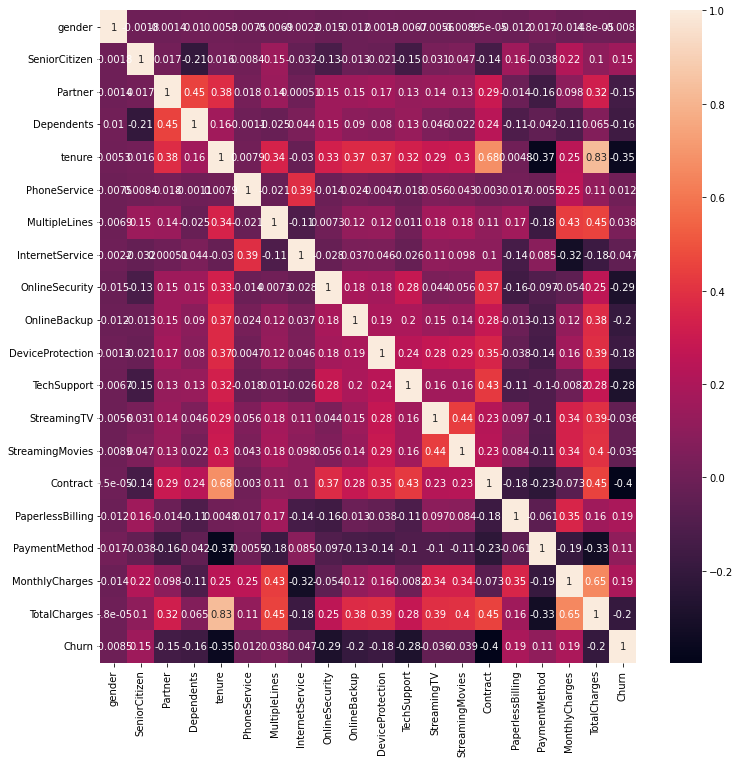

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [64]:
df.corr()["Churn"].sort_values()

Contract           -0.396150
tenure             -0.354049
OnlineSecurity     -0.289050
TechSupport        -0.282232
TotalCharges       -0.199484
OnlineBackup       -0.195290
DeviceProtection   -0.177883
Dependents         -0.163128
Partner            -0.149982
InternetService    -0.047097
StreamingMovies    -0.038802
StreamingTV        -0.036303
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.038043
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

In [65]:
# 2) Decision Tree features importance

In [66]:
X=df.drop("Churn",axis=1)
y = df["Churn"]

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [69]:
model.feature_importances_

array([0.0257276 , 0.01813974, 0.01417726, 0.01958808, 0.11482207,
       0.0014743 , 0.02007378, 0.02822735, 0.0448604 , 0.01152887,
       0.02112989, 0.01675217, 0.01237833, 0.0108745 , 0.16930023,
       0.01812249, 0.03882455, 0.18829644, 0.22570195])

In [70]:
model.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [71]:
data = pd.DataFrame({"Column":model.feature_names_in_,"Value":model.feature_importances_})

In [72]:
data.sort_values("Value")

,Column,Value
5,PhoneService,0.001474
13,StreamingMovies,0.010875
9,OnlineBackup,0.011529
12,StreamingTV,0.012378
2,Partner,0.014177
11,TechSupport,0.016752
15,PaperlessBilling,0.018122
1,SeniorCitizen,0.018140
3,Dependents,0.019588
6,MultipleLines,0.020074


In [73]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=11) #Decision tree
fit = rfe.fit(X, y)

print(fit.n_features_,fit.support_,fit.ranking_)

11 [ True  True False  True  True False False  True  True False False False
 False False  True  True  True  True  True] [1 1 4 1 1 9 3 1 1 6 2 5 7 8 1 1 1 1 1]


In [74]:
fit.get_feature_names_out()

array(['gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'InternetService', 'OnlineSecurity', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [75]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7028,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7029,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7030,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [76]:
data = pd.DataFrame({"Column":X.columns,"Ranking":fit.ranking_})

In [77]:
data[data["Ranking"]>1]

,Column,Ranking
2,Partner,4
5,PhoneService,9
6,MultipleLines,3
9,OnlineBackup,6
10,DeviceProtection,2
11,TechSupport,5
12,StreamingTV,7
13,StreamingMovies,8


In [78]:
#PhoneService,StreamingMovies,StreamingTV,MultipleLines,Partner 

In [79]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7028,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7029,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [80]:
df = df.drop(["PhoneService","StreamingMovies","StreamingTV","MultipleLines","Partner"],axis=1)

In [81]:
df

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,1,0,0,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,1,0,0,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,1,0,0,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,24,0,2,0,2,2,1,1,3,84.80,1990.50,0
7028,0,0,1,72,1,0,2,2,0,1,1,1,103.20,7362.90,0
7029,0,0,1,11,0,2,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,0,4,1,0,0,0,0,0,1,3,74.40,306.60,1


In [82]:
X = df.drop("Churn",axis=1)

In [83]:
from sklearn.cluster import DBSCAN

In [84]:
dbscan = DBSCAN(eps=7, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=7, min_samples=4)

In [85]:
dbscan.labels_

array([  0,   1,   0, ...,  -1,  79, 194], dtype=int64)

In [86]:
df["Label"] = dbscan.labels_

In [87]:
df["Label"].value_counts()

-1      3286
 0      1250
 15      238
 11      171
 58       69
        ... 
 238       3
 272       3
 161       3
 157       3
 266       3
Name: Label, Length: 297, dtype: int64

In [88]:
df[df["Label"]==-1]["Churn"].value_counts()

0    2558
1     728
Name: Churn, dtype: int64

# Data Saving

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("Telecom-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [91]:
df = df.drop(["customerID","PhoneService","StreamingMovies","StreamingTV","MultipleLines","Partner"],axis=1)

In [92]:
df

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [93]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [94]:
idx = df[df["TotalCharges"].isnull()].index

In [95]:
df = df.drop(idx,axis=0).reset_index()

In [96]:
df = df.drop("index",axis=1)

In [97]:
df

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Undersampling

<AxesSubplot:ylabel='Churn'>

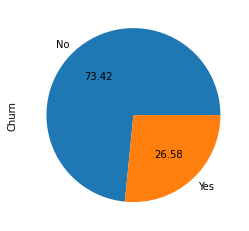

In [98]:
df.Churn.value_counts().plot(kind='pie',autopct="%0.2f")

In [99]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

In [100]:
from imblearn.under_sampling import RandomUnderSampler

In [101]:
rus = RandomUnderSampler(random_state=0)

In [102]:
X_resampled,y_resampled = rus.fit_resample(X,y)

<AxesSubplot:ylabel='Churn'>

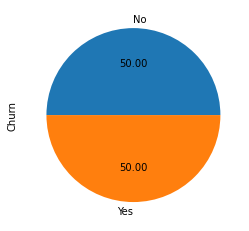

In [103]:
y_resampled.value_counts().plot(kind="pie",autopct="%0.2f")

In [104]:
X_resampled["Churn"] = y_resa mpled

In [105]:
X_resampled.to_csv("final.csv")